In [7]:
#Librerias necesarias
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold
from catboost import CatBoostRegressor, metrics

In [27]:
#Cargamos el dataset limpio 
data = pd.read_csv('dataclean.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.sample(3)

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,...,neighbourhood_cleansed_Villa Pueyrredon,neighbourhood_cleansed_Villa Real,neighbourhood_cleansed_Villa Riachuelo,neighbourhood_cleansed_Villa Santa Rita,neighbourhood_cleansed_Villa Soldati,neighbourhood_cleansed_Villa Urquiza,property_type_House,room_type_Private room,room_type_Shared room,bathroomtype_shared
8845,0,1,2,1,1,1,6845,2,1125,39,...,0,0,0,0,0,0,0,0,0,0
4671,0,0,3,1,1,2,3500,30,45,4,...,0,0,0,0,0,0,0,0,0,0
5151,0,1,2,1,1,1,4900,2,1125,56,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17059 entries, 0 to 17058
Data columns (total 85 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   host_is_superhost                         17059 non-null  int64  
 1   host_identity_verified                    17059 non-null  int64  
 2   accommodates                              17059 non-null  int64  
 3   bathrooms                                 17059 non-null  int64  
 4   bedrooms                                  17059 non-null  int64  
 5   beds                                      17059 non-null  int64  
 6   price                                     17059 non-null  int64  
 7   minimum_nights                            17059 non-null  int64  
 8   maximum_nights                            17059 non-null  int64  
 9   number_of_reviews                         17059 non-null  int64  
 10  review_scores_rating              

In [28]:
#Genero mi variable X
X=data.drop(['price'],axis=1)

#Genero la variable y
y = data['price']

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [5]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#Predict
lr_prediction = regressor.predict(X_test)
lr_prediction_train = regressor.predict(X_train)

score = r2_score(y_test, lr_prediction)

print('LR MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, lr_prediction_train), mean_squared_error(y_test, lr_prediction)))
print('LR R^2 train: %.3f, test: %.3f' % (r2_score(y_train, lr_prediction_train),r2_score(y_test, lr_prediction)))
print('-----------------------------------------------------')


LR MSE train: 17891841.555, test: 19352166.765
LR R^2 train: 0.406, test: 0.392
-----------------------------------------------------


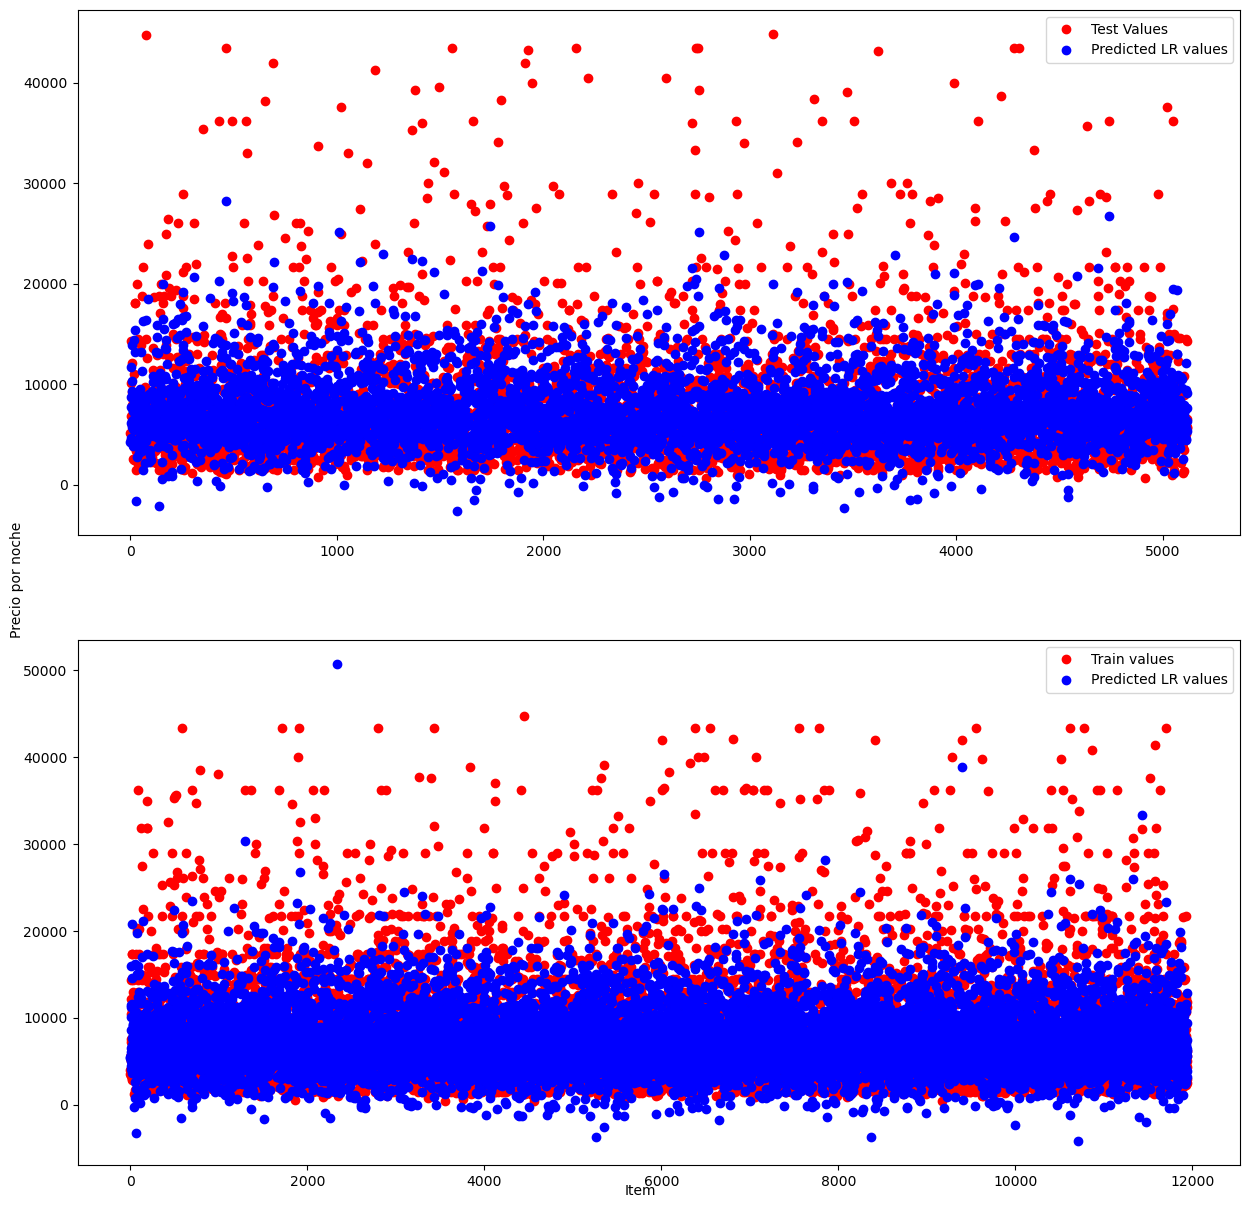

In [6]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

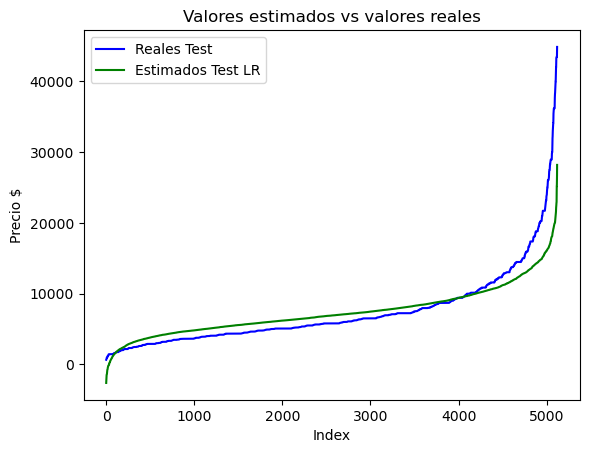

In [7]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('Precio $')
plt.show()

In [29]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

### Random Forest Regression

In [9]:

regressor_rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
regressor_rfr.fit(X_train, y_train.squeeze())

#Model accuracties and validation analysis
#Seattle
y_train_rfr_preds = regressor_rfr.predict(X_train)
y_test_rfr_preds = regressor_rfr.predict(X_test)
print('Random Forest MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_rfr_preds), mean_squared_error(y_test, y_test_rfr_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_rfr_preds),r2_score(y_test, y_test_rfr_preds)))
print('-----------------------------------------------------')



Random Forest MSE train: 2403224.643, test: 17254535.138
Random Forest R^2 train: 0.920, test: 0.458
-----------------------------------------------------


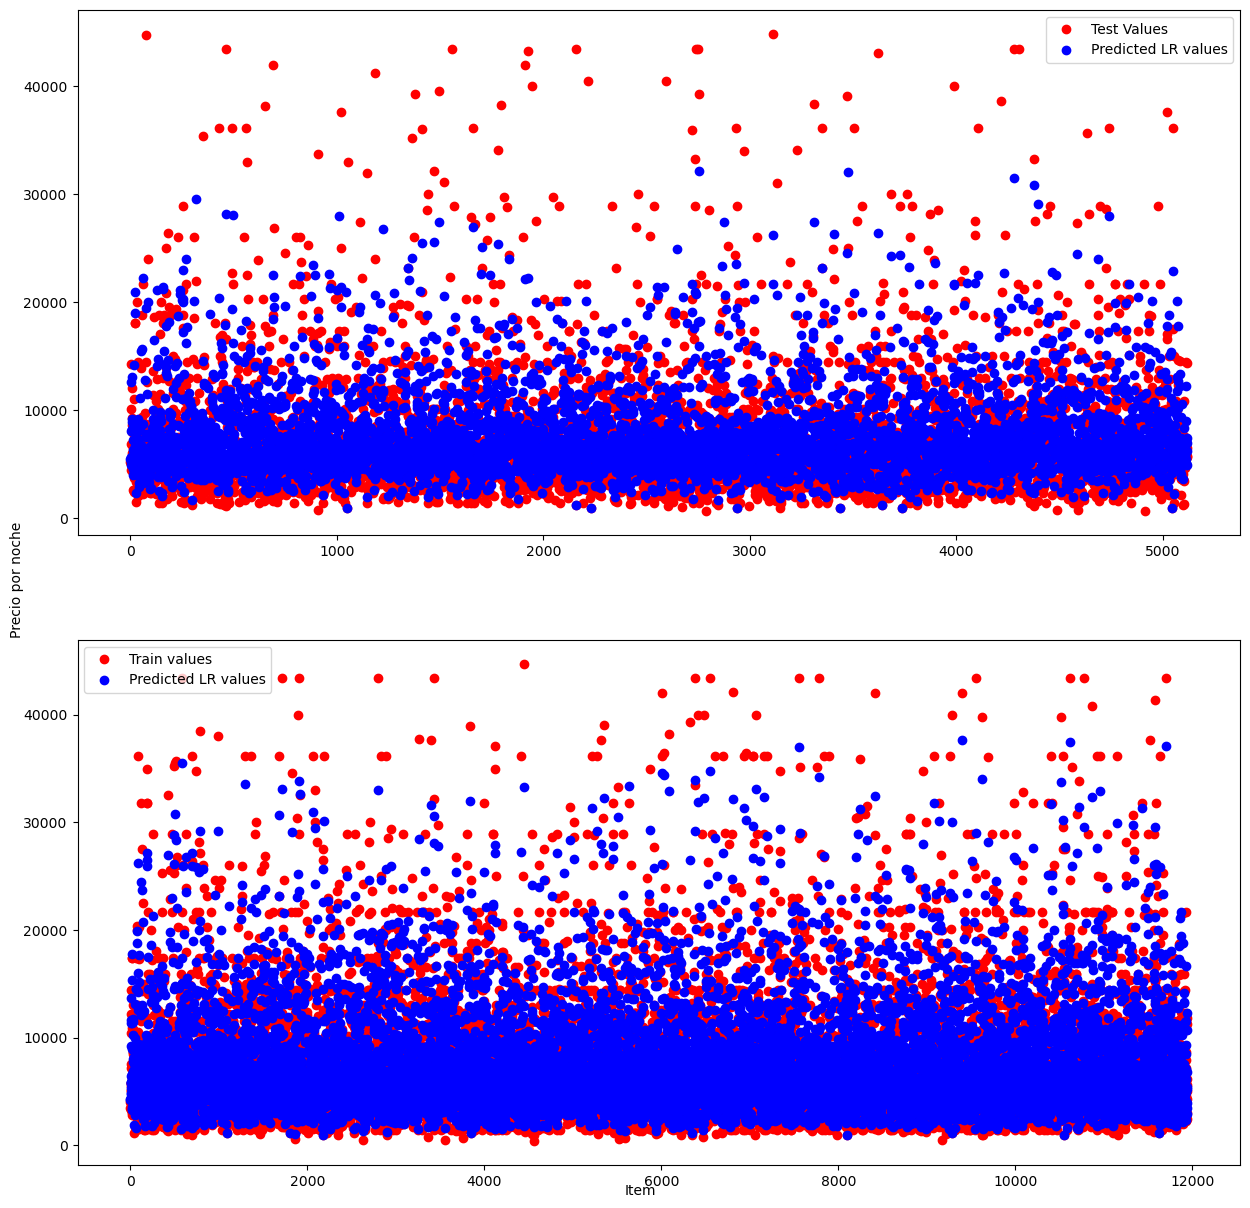

In [10]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_test_rfr_preds, 'bo', label="Predicted RF values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_train_rfr_preds, 'bo', label="Predicted RF values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

Text(0.5, 1.0, 'CABA feature importances')

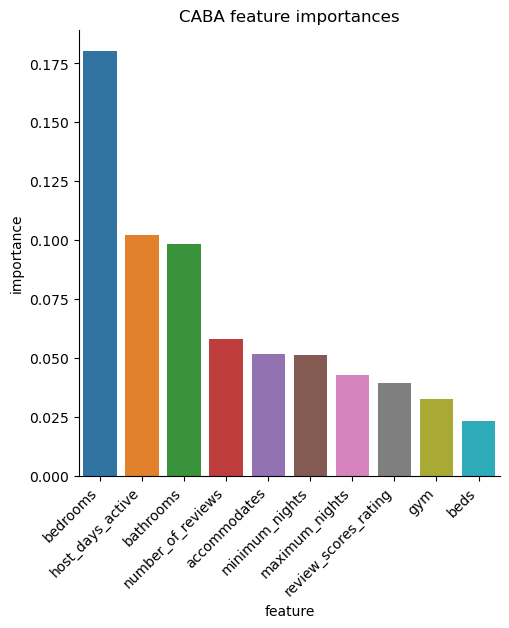

In [11]:
#Feature importancies ranking plot foSeattle's reviews¶
importances = regressor_rfr.feature_importances_
feat_names = X.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result_sort = tree_result.sort_values(by='importance',ascending=False)[:10]
chart = sns.catplot(x='feature', y='importance', kind='bar', data=tree_result_sort)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title(label= "CABA feature importances", fontdict=None, loc='center', pad=None)

### XGBoost Regressor

In [12]:
params_xgb = {  
    "n_estimators": [2000], 
    "max_depth": [7,8], 
    "learning_rate": [0.01],  
}

xgb_model = xgb.XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, param_grid=params_xgb, cv=cv, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/home/docker/.conda/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
          

In [13]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 2000}

In [14]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
y_pred_test_xg = xgb_grid.best_estimator_.predict(X_test)

mse_xg = np.round(mean_squared_error(y_test, y_pred_test_xg),3)
rmse_xg = np.round(np.sqrt(mse_xg),3)
mae_xg = np.round(mean_absolute_error(y_test, y_pred_test_xg),3)
r2_xg =  r2_score(y_test, y_pred_test_xg)

print('---- TEST ---')
print('MAE   :', mae_xg)
print('MSE   :', mse_xg)
print('RMSE  :', rmse_xg)
print('R^2 = :', r2_xg)


y_pred_train_xg = xgb_grid.best_estimator_.predict(X_train)

mse_xg = np.round(mean_squared_error(y_train, y_pred_train_xg),3)
rmse_xg = np.round(np.sqrt(mse_xg),3)
mae_xg = np.round(mean_absolute_error(y_train, y_pred_train_xg),3)
r2_xg =  r2_score(y_train, y_pred_train_xg)

print('---- TRAIN ---')
print('MAE   :', mae_xg)
print('MSE   :', mse_xg)
print('RMSE  :', rmse_xg)
print('R^2 = :', r2_xg)

---- TEST ---
MAE   : 2441.395
MSE   : 16268824.64
RMSE  : 4033.463
R^2 = : 0.4886210207416074
---- TRAIN ---
MAE   : 1686.633
MSE   : 6784260.25
RMSE  : 2604.661
R^2 = : 0.7745882982215214


/home/docker/.conda/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/docker/.conda/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


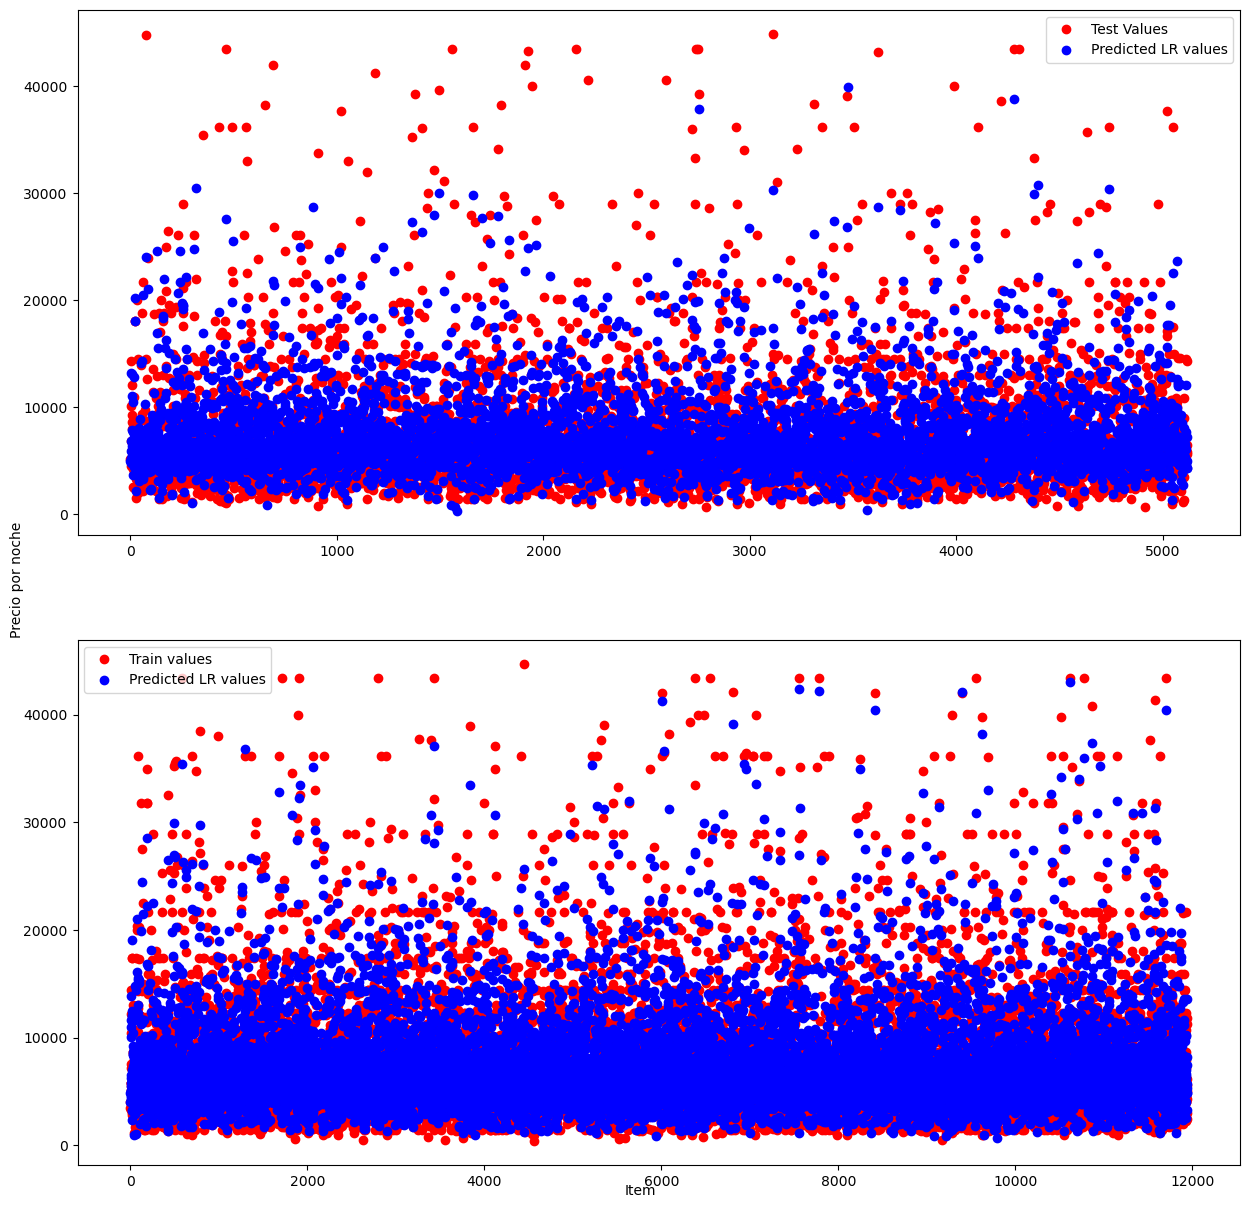

In [16]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_pred_test_xg, 'bo', label="Predicted XGB values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_pred_train_xg, 'bo', label="Predicted XGB values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

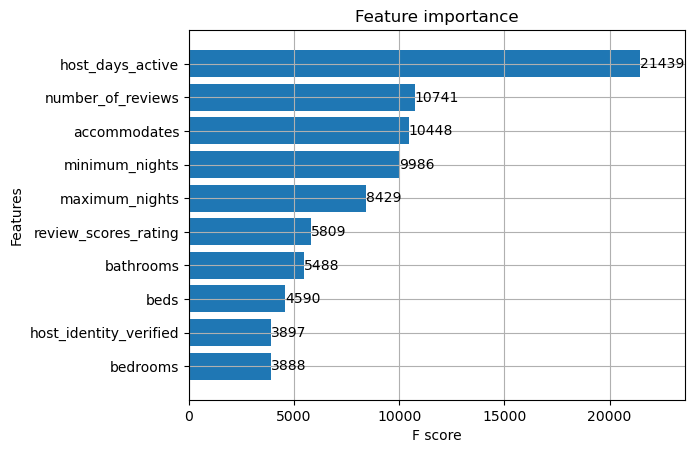

In [17]:
from xgboost import plot_importance
plot_importance(xgb_grid.best_estimator_, height = 0.8,max_num_features=10);

### LGBM

In [34]:

params_lgb = {  
    "n_estimators": [2000,4000], 
    "max_depth": [8], 
    "learning_rate": [0.01],  
}

lgb_model = lgb.LGBMRegressor()
lgb_grid = GridSearchCV(lgb_model, param_grid=params_lgb, cv=cv, verbose=1, n_jobs=-1)
lgb_grid.fit(X_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   17.0s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.3s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [8],
                         'n_estimators': [2000, 4000]},
             verbose=1)

In [35]:
lgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 2000}

In [ ]:
lgb_grid.best_estimator_

In [36]:
y_pred_test_lgb = lgb_grid.best_estimator_.predict(X_test)

mse_lgb = np.round(mean_squared_error(y_test, y_pred_test_lgb),3)
rmse_lgb = np.round(np.sqrt(mse_lgb),3)
mae_lgb = np.round(mean_absolute_error(y_test, y_pred_test_lgb),3)
r2_lgb =  r2_score(y_test, y_pred_test_lgb)

print('---- TEST ---')
print('MAE   :', mae_lgb)
print('MSE   :', mse_lgb)
print('RMSE  :', rmse_lgb)
print('R^2 = :', r2_lgb)


y_pred_train_lgb = lgb_grid.best_estimator_.predict(X_train)

mse_lgb = np.round(mean_squared_error(y_train, y_pred_train_lgb),3)
rmse_lgb = np.round(np.sqrt(mse_lgb),3)
mae_lgb = np.round(mean_absolute_error(y_train, y_pred_train_lgb),3)
r2_lgb =  r2_score(y_train, y_pred_train_lgb)

print('---- TRAIN ---')
print('MAE   :', mae_lgb)
print('MSE   :', mse_lgb)
print('RMSE  :', rmse_lgb)
print('R^2 = :', r2_lgb)

---- TEST ---
MAE   : 2461.768
MSE   : 16325694.037
RMSE  : 4040.507
R^2 = : 0.4868334414493951
---- TRAIN ---
MAE   : 1958.792
MSE   : 9637442.157
RMSE  : 3104.423
R^2 = : 0.6797893716904982


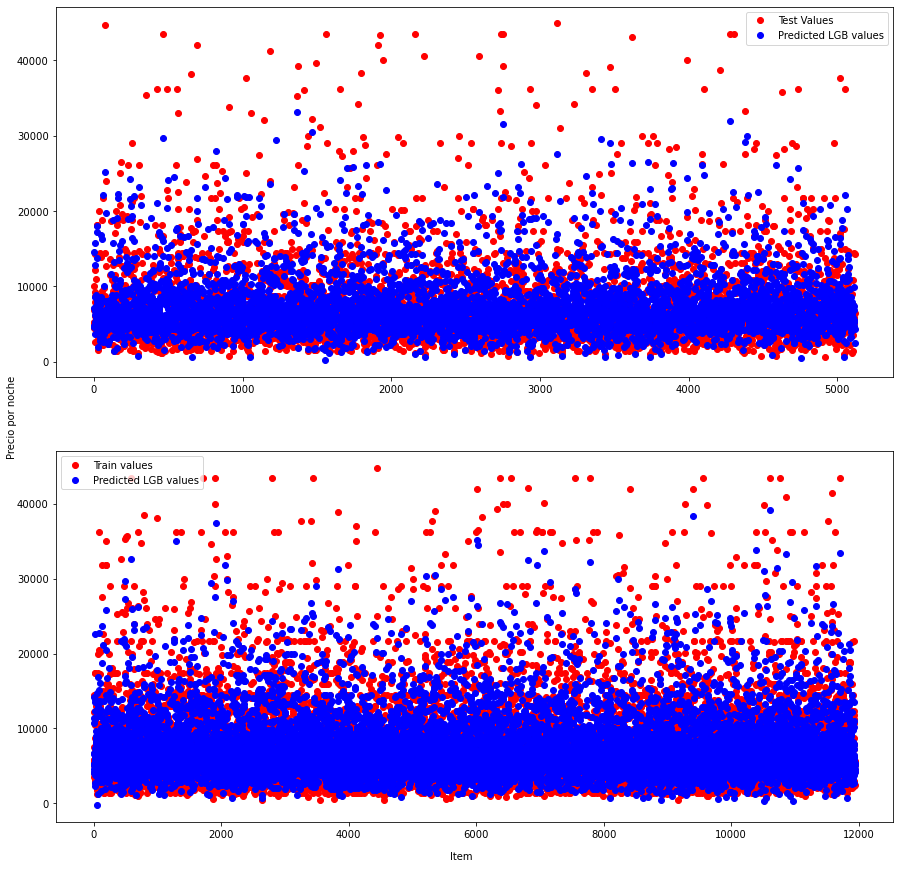

In [37]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_pred_test_lgb, 'bo', label="Predicted LGB values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_pred_train_lgb, 'bo', label="Predicted LGB values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

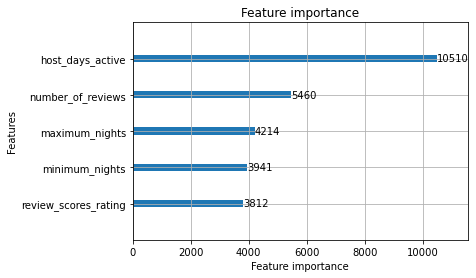

In [38]:
lgb.plot_importance(lgb_grid.best_estimator_, max_num_features=5);

### CatBoost Regressor

In [44]:
parameters_CBR = {'depth'         : [9],
                  'learning_rate' : [0.06],
                  'iterations'    : [1003]
                 }

CBR_model = CatBoostRegressor()
Grid_CBR = GridSearchCV(CBR_model, param_grid = parameters_CBR, cv = cv, verbose = 1, n_jobs=-1)
Grid_CBR.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.6s remaining:   50.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.4s finished


0:	learn: 5377.5708903	total: 27.3ms	remaining: 27.4s
1:	learn: 5275.6740227	total: 48.2ms	remaining: 24.1s
2:	learn: 5188.0281860	total: 63.4ms	remaining: 21.1s
3:	learn: 5104.8244926	total: 87.5ms	remaining: 21.9s
4:	learn: 5029.6675112	total: 102ms	remaining: 20.4s
5:	learn: 4955.6708925	total: 118ms	remaining: 19.7s
6:	learn: 4888.7101225	total: 132ms	remaining: 18.7s
7:	learn: 4827.7730341	total: 144ms	remaining: 17.9s
8:	learn: 4772.4620948	total: 164ms	remaining: 18.2s
9:	learn: 4718.0390591	total: 180ms	remaining: 17.9s
10:	learn: 4668.5481973	total: 196ms	remaining: 17.6s
11:	learn: 4621.7315608	total: 247ms	remaining: 20.4s
12:	learn: 4578.2868104	total: 277ms	remaining: 21.1s
13:	learn: 4541.1685891	total: 291ms	remaining: 20.6s
14:	learn: 4505.4595892	total: 304ms	remaining: 20s
15:	learn: 4471.3298748	total: 323ms	remaining: 20s
16:	learn: 4438.3767081	total: 339ms	remaining: 19.6s
17:	learn: 4408.0983515	total: 388ms	remaining: 21.2s
18:	learn: 4378.6176991	total: 401ms	r

154:	learn: 3529.4650716	total: 3.16s	remaining: 17.3s
155:	learn: 3526.1392517	total: 3.17s	remaining: 17.2s
156:	learn: 3524.8573015	total: 3.19s	remaining: 17.2s
157:	learn: 3521.0824824	total: 3.22s	remaining: 17.2s
158:	learn: 3519.1991408	total: 3.24s	remaining: 17.2s
159:	learn: 3516.8711894	total: 3.27s	remaining: 17.2s
160:	learn: 3510.8113204	total: 3.29s	remaining: 17.2s
161:	learn: 3508.0256908	total: 3.3s	remaining: 17.1s
162:	learn: 3504.0761881	total: 3.32s	remaining: 17.1s
163:	learn: 3502.2762446	total: 3.33s	remaining: 17s
164:	learn: 3500.1991041	total: 3.35s	remaining: 17s
165:	learn: 3498.6626676	total: 3.38s	remaining: 17s
166:	learn: 3495.6692738	total: 3.41s	remaining: 17.1s
167:	learn: 3491.4824610	total: 3.43s	remaining: 17s
168:	learn: 3489.4541466	total: 3.44s	remaining: 17s
169:	learn: 3484.5918926	total: 3.46s	remaining: 16.9s
170:	learn: 3481.9309791	total: 3.47s	remaining: 16.9s
171:	learn: 3478.4418143	total: 3.5s	remaining: 16.9s
172:	learn: 3475.69202

311:	learn: 3180.9204446	total: 6.22s	remaining: 13.8s
312:	learn: 3178.9243528	total: 6.23s	remaining: 13.7s
313:	learn: 3177.6582187	total: 6.25s	remaining: 13.7s
314:	learn: 3173.2652486	total: 6.27s	remaining: 13.7s
315:	learn: 3171.1402580	total: 6.28s	remaining: 13.7s
316:	learn: 3170.2568987	total: 6.29s	remaining: 13.6s
317:	learn: 3168.2333668	total: 6.33s	remaining: 13.6s
318:	learn: 3167.2448737	total: 6.34s	remaining: 13.6s
319:	learn: 3164.1208681	total: 6.36s	remaining: 13.6s
320:	learn: 3163.0268336	total: 6.42s	remaining: 13.6s
321:	learn: 3160.8733835	total: 6.44s	remaining: 13.6s
322:	learn: 3159.9164788	total: 6.46s	remaining: 13.6s
323:	learn: 3159.1888298	total: 6.5s	remaining: 13.6s
324:	learn: 3157.3183128	total: 6.52s	remaining: 13.6s
325:	learn: 3155.2571750	total: 6.53s	remaining: 13.6s
326:	learn: 3154.7204878	total: 6.55s	remaining: 13.5s
327:	learn: 3152.7750863	total: 6.57s	remaining: 13.5s
328:	learn: 3151.9912058	total: 6.58s	remaining: 13.5s
329:	learn:

463:	learn: 2939.3326210	total: 9.38s	remaining: 10.9s
464:	learn: 2939.0877739	total: 9.39s	remaining: 10.9s
465:	learn: 2938.2471946	total: 9.41s	remaining: 10.8s
466:	learn: 2937.0918389	total: 9.43s	remaining: 10.8s
467:	learn: 2934.8337248	total: 9.44s	remaining: 10.8s
468:	learn: 2932.8532860	total: 9.46s	remaining: 10.8s
469:	learn: 2932.4716080	total: 9.47s	remaining: 10.7s
470:	learn: 2931.1553911	total: 9.49s	remaining: 10.7s
471:	learn: 2930.0376389	total: 9.52s	remaining: 10.7s
472:	learn: 2927.4759954	total: 9.54s	remaining: 10.7s
473:	learn: 2926.5479125	total: 9.56s	remaining: 10.7s
474:	learn: 2926.0465954	total: 9.57s	remaining: 10.6s
475:	learn: 2925.2908995	total: 9.59s	remaining: 10.6s
476:	learn: 2923.2842350	total: 9.6s	remaining: 10.6s
477:	learn: 2921.4101912	total: 9.64s	remaining: 10.6s
478:	learn: 2919.8785496	total: 9.71s	remaining: 10.6s
479:	learn: 2919.1013700	total: 9.72s	remaining: 10.6s
480:	learn: 2917.9525208	total: 9.74s	remaining: 10.6s
481:	learn:

619:	learn: 2725.5633526	total: 12.5s	remaining: 7.71s
620:	learn: 2723.6846263	total: 12.5s	remaining: 7.69s
621:	learn: 2722.6182124	total: 12.5s	remaining: 7.67s
622:	learn: 2722.2152562	total: 12.5s	remaining: 7.64s
623:	learn: 2720.7549399	total: 12.5s	remaining: 7.62s
624:	learn: 2719.6272024	total: 12.6s	remaining: 7.6s
625:	learn: 2719.3617797	total: 12.6s	remaining: 7.57s
626:	learn: 2719.0767540	total: 12.6s	remaining: 7.56s
627:	learn: 2716.6081938	total: 12.6s	remaining: 7.54s
628:	learn: 2716.2568168	total: 12.7s	remaining: 7.53s
629:	learn: 2713.0619774	total: 12.7s	remaining: 7.5s
630:	learn: 2712.3927323	total: 12.7s	remaining: 7.49s
631:	learn: 2711.6072753	total: 12.7s	remaining: 7.48s
632:	learn: 2710.1241247	total: 12.8s	remaining: 7.46s
633:	learn: 2708.8479784	total: 12.8s	remaining: 7.43s
634:	learn: 2708.3440730	total: 12.8s	remaining: 7.41s
635:	learn: 2706.6841877	total: 12.8s	remaining: 7.4s
636:	learn: 2704.6660191	total: 12.8s	remaining: 7.38s
637:	learn: 2

775:	learn: 2523.6152910	total: 15.5s	remaining: 4.55s
776:	learn: 2522.5585087	total: 15.6s	remaining: 4.52s
777:	learn: 2521.1616549	total: 15.6s	remaining: 4.5s
778:	learn: 2520.4362879	total: 15.6s	remaining: 4.48s
779:	learn: 2519.0397418	total: 15.6s	remaining: 4.46s
780:	learn: 2517.7593139	total: 15.6s	remaining: 4.44s
781:	learn: 2515.7743737	total: 15.6s	remaining: 4.42s
782:	learn: 2514.4266176	total: 15.7s	remaining: 4.41s
783:	learn: 2513.7080268	total: 15.7s	remaining: 4.38s
784:	learn: 2512.5252283	total: 15.7s	remaining: 4.36s
785:	learn: 2511.6038254	total: 15.7s	remaining: 4.34s
786:	learn: 2510.3063149	total: 15.7s	remaining: 4.32s
787:	learn: 2509.3028017	total: 15.8s	remaining: 4.31s
788:	learn: 2507.5128625	total: 15.8s	remaining: 4.29s
789:	learn: 2506.1237120	total: 15.8s	remaining: 4.27s
790:	learn: 2505.9061710	total: 15.9s	remaining: 4.25s
791:	learn: 2505.2014847	total: 15.9s	remaining: 4.23s
792:	learn: 2503.3925204	total: 15.9s	remaining: 4.21s
793:	learn:

931:	learn: 2351.7464037	total: 18.9s	remaining: 1.44s
932:	learn: 2350.1962915	total: 18.9s	remaining: 1.42s
933:	learn: 2348.9532961	total: 18.9s	remaining: 1.39s
934:	learn: 2347.8800434	total: 18.9s	remaining: 1.37s
935:	learn: 2346.8121945	total: 18.9s	remaining: 1.35s
936:	learn: 2345.3736520	total: 18.9s	remaining: 1.33s
937:	learn: 2344.7890974	total: 19s	remaining: 1.31s
938:	learn: 2344.0167201	total: 19s	remaining: 1.29s
939:	learn: 2342.7841173	total: 19s	remaining: 1.27s
940:	learn: 2341.9091867	total: 19s	remaining: 1.25s
941:	learn: 2339.8430712	total: 19.1s	remaining: 1.23s
942:	learn: 2339.4371419	total: 19.1s	remaining: 1.21s
943:	learn: 2337.8118739	total: 19.1s	remaining: 1.19s
944:	learn: 2337.7478226	total: 19.1s	remaining: 1.17s
945:	learn: 2336.3217805	total: 19.1s	remaining: 1.15s
946:	learn: 2334.5023311	total: 19.1s	remaining: 1.13s
947:	learn: 2334.2278256	total: 19.2s	remaining: 1.11s
948:	learn: 2334.1822080	total: 19.2s	remaining: 1.09s
949:	learn: 2333.8

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x0000029E89479580>,
             n_jobs=-1,
             param_grid={'depth': [9], 'iterations': [1003],
                         'learning_rate': [0.06]},
             verbose=1)

In [45]:
Grid_CBR.best_params_

{'depth': 9, 'iterations': 1003, 'learning_rate': 0.06}

In [46]:
Grid_CBR.best_estimator_

In [47]:
y_pred_test_cbr = Grid_CBR.best_estimator_.predict(X_test)

mse_cbr = np.round(mean_squared_error(y_test, y_pred_test_cbr),3)
rmse_cbr = np.round(np.sqrt(mse_cbr),3)
mae_cbr = np.round(mean_absolute_error(y_test, y_pred_test_cbr),3)
r2_cbr =  r2_score(y_test, y_pred_test_cbr)

print('---- TEST ---')
print('MAE   :', mae_cbr)
print('MSE   :', mse_cbr)
print('RMSE  :', rmse_cbr)
print('R^2 = :', r2_cbr)


y_pred_train_cbr = Grid_CBR.best_estimator_.predict(X_train)

mse_cbr = np.round(mean_squared_error(y_train, y_pred_train_cbr),3)
rmse_cbr = np.round(np.sqrt(mse_cbr),3)
mae_cbr = np.round(mean_absolute_error(y_train, y_pred_train_cbr),3)
r2_cbr =  r2_score(y_train, y_pred_train_cbr)

print('---- TRAIN ---')
print('MAE   :', mae_cbr)
print('MSE   :', mse_cbr)
print('RMSE  :', rmse_cbr)
print('R^2 = :', r2_cbr)

---- TEST ---
MAE   : 2441.652
MSE   : 16331022.38
RMSE  : 4041.166
R^2 = : 0.48666595530573187
---- TRAIN ---
MAE   : 1496.81
MSE   : 5192976.295
RMSE  : 2278.81
R^2 = : 0.8274597994821449


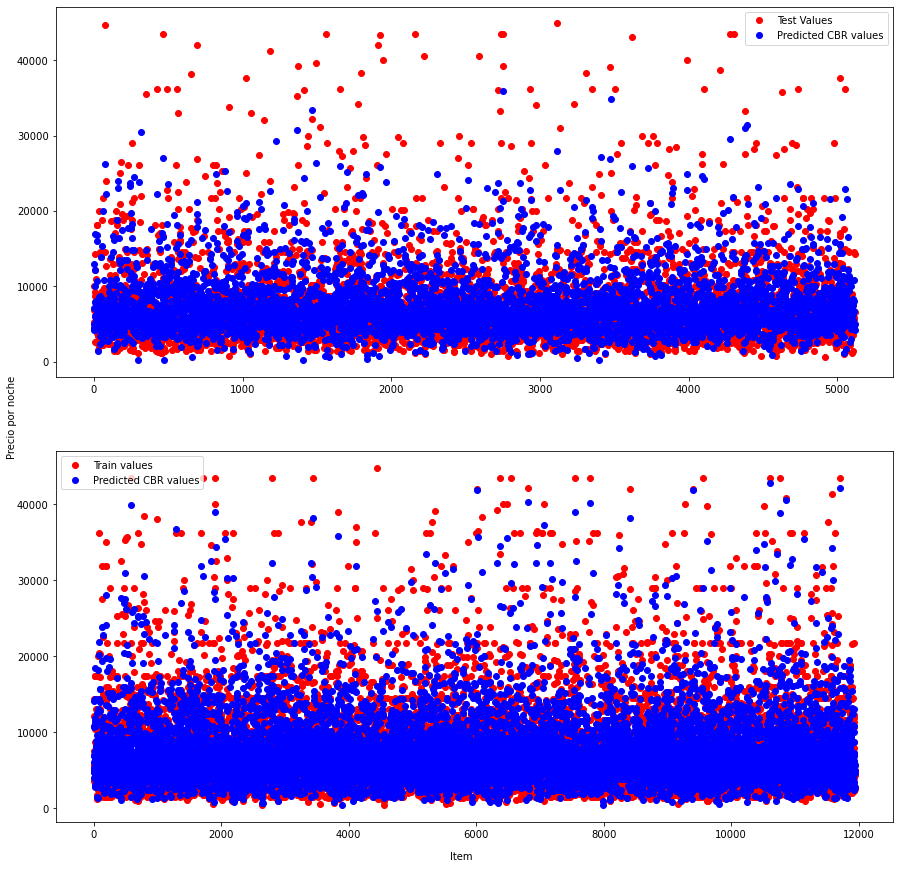

In [48]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_pred_test_cbr, 'bo', label="Predicted CBR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_pred_train_cbr, 'bo', label="Predicted CBR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

In [24]:
# Guardar modelo

joblib.dump(lgb_grid.best_estimator_,'model.sav')

['model.sav']